In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from apyori import apriori
import os
import sys
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

/Users/ppx/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
printing_mode = True

On importe le travail préalable

In [5]:
%run import_data

Les variables qui, d'un premier abord, semblent inutiles.

In [6]:
colonnes_inutiles = ['num_veh',
                                'Num_Acc']
""",
                                'locp',
                                'actp',
                                'etatp',
                                'catv',
                                'hrmn',
                                'mois',
                                'jour',
                                'catvopp',
                                'occutc',
                                'place']
"""

",\n                                'locp',\n                                'actp',\n                                'etatp',\n                                'catv',\n                                'hrmn',\n                                'mois',\n                                'jour',\n                                'catvopp',\n                                'occutc',\n                                'place']\n"

In [7]:
merged_data = merged_data.drop(colonnes_inutiles,axis = 1)

In [8]:
df = pd.get_dummies(merged_data, columns = merged_data.columns)
results = list(apriori(df))

In [9]:
y = merged_data.grav
merged_data_sans_grav = merged_data.drop(['grav'],axis = 1)

Mise en place d'apriori sur les données des décédés

In [10]:
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

listing_apriori_bis = []
data_accident = merged_data[merged_data.grav == 2].drop('grav', axis = 1)



for indexe in data_accident.index:
    event = []
    for colonne in data_accident.columns:
        if not (data_accident[colonne][indexe] == 0):
            event.append(colonne + str(data_accident[colonne][indexe]))
    listing_apriori_bis.append(event)

len(listing_apriori_bis)



min_sup = 0.40
min_conf = 0.90
results_apriori_decedes = list(apriori(listing_apriori_bis, min_support = min_sup, min_confidence = min_conf))

print(len(results_apriori_decedes))

os.system('say "fini"')

95


0

In [11]:
if printing_mode:
    for x in range(0,len(results_apriori_decedes)):
        print(results_apriori_decedes[x].items)
        print('support')
        print(results_apriori_decedes[x].support)
        print('confiance')
        print(results_apriori_decedes[x].ordered_statistics[0].confidence)


frozenset({'int1', 'agg1'})
support
0.7283887468030691
confiance
0.9110684580934102
frozenset({'catu1', 'place1.0'})
support
0.7227621483375959
confiance
0.9992927864214993
frozenset({'catv7', 'catv_gen2'})
support
0.648081841432225
confiance
1.0
frozenset({'int1', 'catv7'})
support
0.589769820971867
confiance
0.9100236779794791
frozenset({'catv7', 'secu11.0'})
support
0.40971867007672635
confiance
0.9123006833712984
frozenset({'int1', 'catv_gen2'})
support
0.6317135549872123
confiance
0.9100957995578483
frozenset({'catv_gen2', 'secu11.0'})
support
0.4332480818414322
confiance
0.9646924829157175
frozenset({'catvopp_gen2', 'catvopp7'})
support
0.6465473145780051
confiance
1.0
frozenset({'int1', 'secu11.0'})
support
0.4112531969309463
confiance
0.9157175398633258
frozenset({'int1', 'atm1', 'agg1'})
support
0.5447570332480819
confiance
0.9071550255536627
frozenset({'int1', 'catu1', 'agg1'})
support
0.5457800511508951
confiance
0.9057724957555178
frozenset({'catu1', 'place1.0', 'agg1'})
su

On essaie de prédire la vraie catégorie

In [12]:


### Préparation des données
X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)


train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train


### Parametres
max_depth=10
learning_rate=0.01
n_estimators=100
silent=True
objective='binary:logistic'
booster='gblinear'
n_jobs=100
nthread=None
gamma=0.1
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
reg_alpha=0.5
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0
seed=None
missing=None


### Training
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)


### Predictions
predictions = gbm.predict(test_X)


### Resultats
pourcentage = (predictions - y_test).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print(1 + sum(pourcentage)/len(pourcentage))

0.603022825416


Ici on essaie juste de prédire grave / pas grave

pourcentage
0.817149907465
tailles
(24312, 27) (8105, 27) (24312,) (8105,)
1726 4897 1150 332


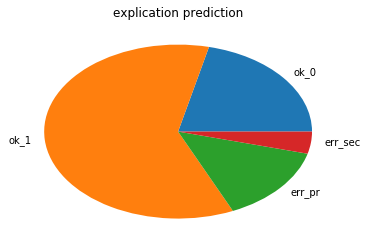

In [32]:
X_train_grave_pas_grave, X_test_grave_pas_grave, y_train_grave_pas_grave, y_test_grave_pas_grave = train_test_split(merged_data_sans_grav, y, test_size=0.25)

cat1 = [1]
cat2 = [2,3,4]

y_train_grave_pas_grave = y_train_grave_pas_grave.replace(cat1,0)
y_train_grave_pas_grave = y_train_grave_pas_grave.replace(cat2,1)
y_test_grave_pas_grave = y_test_grave_pas_grave.replace(cat1,0)
y_test_grave_pas_grave = y_test_grave_pas_grave.replace(cat2,1)

train_X_grave_pas_grave = X_train_grave_pas_grave.as_matrix()
test_X_grave_pas_grave = X_test_grave_pas_grave.as_matrix()
train_y_grave_pas_grave = y_train_grave_pas_grave
test_y_grave_pas_grave = y_test_grave_pas_grave

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X_grave_pas_grave, train_y_grave_pas_grave)
predictions_grave_pas_grave = gbm.predict(test_X_grave_pas_grave)

pourcentage = (predictions_grave_pas_grave - y_test_grave_pas_grave).replace(to_replace = [-4,-3,-2,-1,1,2,3,4], value = -1)
print('pourcentage')
print(1 + sum(pourcentage)/len(pourcentage))
print('tailles')
print(train_X_grave_pas_grave.shape,
      test_X_grave_pas_grave.shape, 
      train_y_grave_pas_grave.shape, 
      test_y_grave_pas_grave.shape)

length = len(predictions_grave_pas_grave)
y_test_liste_grave_pas_grave = list(y_test_grave_pas_grave)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions_grave_pas_grave[iteration] == 0:
        if y_test_liste_grave_pas_grave[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste_grave_pas_grave[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()


In [23]:
y_sexe = merged_data.sexe
merged_data_sans_sexe = merged_data.drop(['sexe'],axis = 1)


X_train, X_test, y_train, y_test = train_test_split(merged_data_sans_grav, y, test_size=0.1)

cat1 = [1,3,4]
cat2 = [2]

y_train = y_train.replace(cat1,0)
y_train = y_train.replace(cat2,1)
y_test = y_test.replace(cat1,0)
y_test = y_test.replace(cat2,1)

train_X = X_train.as_matrix()
test_X = X_test.as_matrix()
train_y = y_train
test_y = y_test

# You can experiment with many other options here, using the same .fit() and .predict()
# methods; see http://scikit-learn.org
# This example uses the current build of XGBoost, from https://github.com/dmlc/xgboost
gbm = xgb.XGBClassifier(max_depth = max_depth, 
                        n_estimators = n_estimators, 
                        learning_rate = learning_rate,
                        gamma = gamma,
                        reg_alpha= reg_alpha).fit(train_X, train_y)
predictions_decede_vivant = gbm.predict_proba(test_X)



In [24]:
def TP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] > theta and x == 1:
            count += 1
        i += 1
    return count

def FP(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] >= theta and x == 0:
            count += 1
        i += 1
    return count

def TN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 0:
            count += 1
        i += 1
    return count

def FN(theta,pred,result):
    count = 0
    i = 0
    for x in (result):
        if pred[i][1] < theta and x == 1:
            count += 1
        i += 1
    return count



In [25]:
class ROC_curves:
    def __init__(self, pred = predictions_grave_pas_grave, res = y_test_grave_pas_grave, gran = 101):
        x = []
        y = []
        for j in range(0,gran):
            tn = TN(j/(gran-1),pred,res)
            neg = tn + FP(j/(gran-1),pred,res)
            tp = TP(j/(gran-1),pred,res)
            pos = tp + FN(j/(gran-1),pred,res)

            if neg == 0:
                x.append(0)
            else:
                x.append(tn / neg)
            if pos == 0:
                y.append(0)
            else:
                y.append(tp / pos)
        self.rocx = x
        self.rocy = y
    def plot_it(self):
        plt.plot(self.rocx,self.rocy)
        plt.show()
    


In [26]:
ROC = ROC_curves()


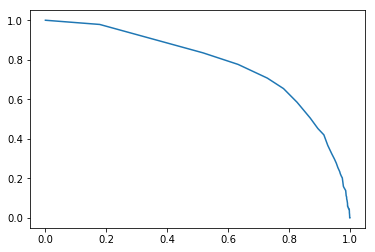

3037 10 17 178


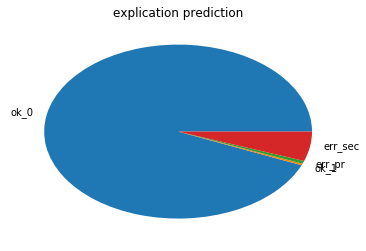

In [27]:
ROC.plot_it()


predictions = gbm.predict(test_X)
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [ ]:
sum(y_train)/len(y_train)

In [ ]:
clf = LinearSVC(random_state=0, C = 123)
clf.fit(X_train,y_train)

In [ ]:
X_test.head()

In [ ]:
predictors = ['catu', 'choc', 'mom', 'catv_gen','catvopp_gen']
X_train = X_train[predictors]
X_test = X_test[predictors]
clf = LinearSVC( C = 123, max_iter=12)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
length = len(predictions)
y_test_liste = list(y_test)
ok_0 = 0
ok_1 = 0
err_pr = 0
err_sec = 0
for iteration in range(0,length):
    if predictions[iteration] == 0:
        if y_test_liste[iteration] == 0:
            ok_0 += 1
        else:
            err_sec += 1
    else:
        if y_test_liste[iteration] == 1:
            ok_1 += 1
        else:
            err_pr +=1
print(ok_0,ok_1,err_pr, err_sec)
labels = ['ok_0','ok_1','err_pr', 'err_sec']
values = [ok_0,ok_1,err_pr, err_sec]
plt.pie(values, labels = labels)
plt.title('explication prediction' )
plt.show()
plt.close()

In [ ]:
set(predictions)
sum(predictions)